<a href="https://colab.research.google.com/github/yusufkhanservicenow/Hotel-Booking-Analysis-Capstone-Project-in-Team/blob/main/Hotel_Booking_Analysis_Solution_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Mounting the Notebook from Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Pandas, pycountry, matplotlib.pyplot and seaborn.**

In [37]:
!pip install pycountry # Using !pip, To import a library that's not in Colaboratory by default
import pandas as pd # IMPORITNG PANDAS
import seaborn as sns # IMPORTING SEABORN
import matplotlib #IMPORTING MATPLOTLIB
import pycountry as pc #IMPORTING PYCOUNTRY
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Providing the Path to Read the CSV File**

In [3]:
path = '/content/drive/MyDrive/AlmaBetter/Python for Data Science/Capstone Project/Copy of Hotel Bookings.csv'

df = pd.read_csv(path)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Cleaning : Checking for missing or null values in any of the columns.**

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df['country'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Separating and creating different datasets of both the hotel types. (i.e., Resort and City Hotel)**

In [8]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df_for_Resort_Hotel = df[df.hotel == "Resort Hotel"]
df_for_City_Hotel= df[df.hotel == "City Hotel"]

**ANALYSIS # 1 : Checking the Status of Reservation and the Repeated Guest of City Hotel and Resort Hotel**            
**Result By Analysis :** It helps the company to get the detail about the Check-out and Cancel Reservation Status 

Text(0.5, 1.0, 'Reservation Status')

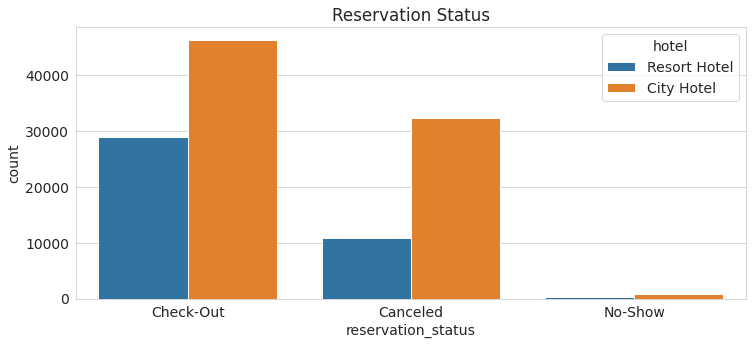

In [9]:
sns.countplot (x= 'reservation_status', data= df, hue= 'hotel').set_title ('Reservation Status')

Text(0.5, 1.0, 'Status of Repeated Guest')

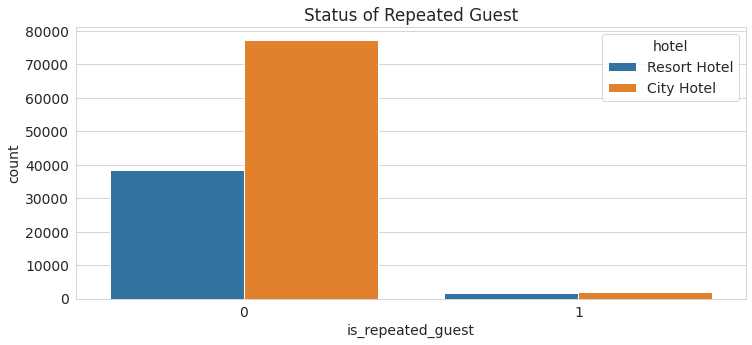

In [10]:
sns.countplot (x= 'is_repeated_guest', data= df, hue= 'hotel').set_title ('Status of Repeated Guest')

**ANALYSIS # 2 : Country Name from where most of the Guests are coming**        
**Result By Analysis :** This Analysis helps company to make a custom or attractive packages for the country from where less guests are coming


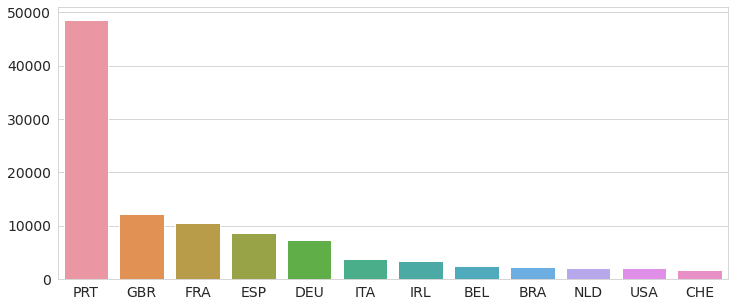

In [11]:
sns.barplot (y= list(df.country.value_counts().head (12)), x= list(df.country.value_counts().head(12).index))

**ANALYSIS # 3 : Month Wise Bookings**        
**Result By Analysis :** By this Analysis Company can figure Out which month have less no. of bookings, and provide some offers in that months to increase the sales

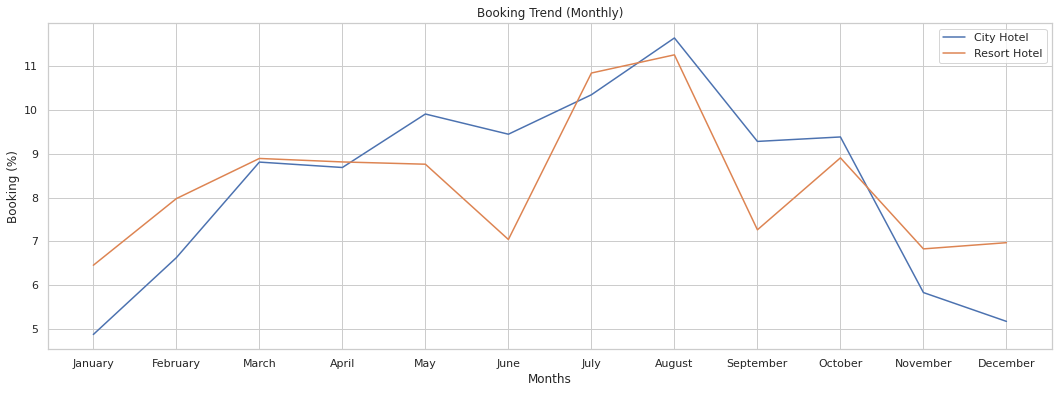

In [30]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
df_not_canceled = df[df['is_canceled'] == 0]
## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x2, y2.values, label='Resort Hotel', sort=False)

plt.show()


**ANALYSIS # 4 : Bookings by Various Sources**        
**Result By Analysis :** By this, Company can get the sources of Booking and get the Idea on which platfom they have to focus

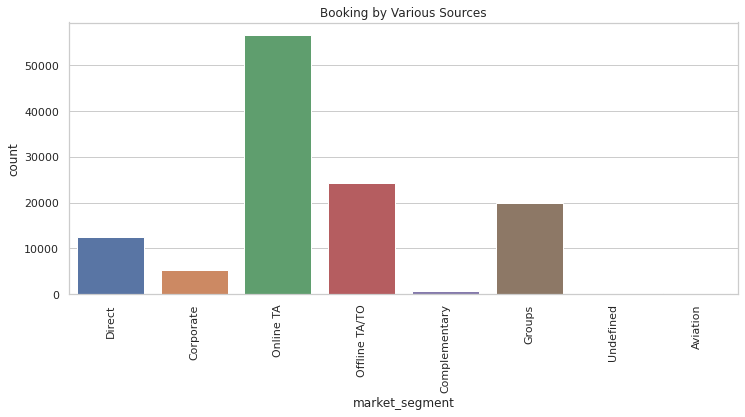

In [31]:
plt.title("Booking by Various Sources")
ax = sns.countplot(x = "market_segment", data = df,)
plt.xticks(rotation = 90)
plt.show()

**ANALYSIS # 5 : Monthly Cancellations**        
**Result By Analysis :** By this Analysis Company can figure Out which month have max. number of cancellations so that they can have the Idea of Reason for Cancellation like month containing less holidays etc..

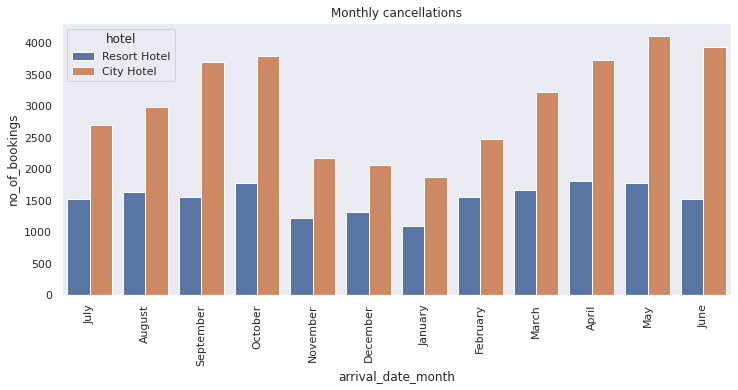

In [17]:
df_copy1= df.copy()
df_copy1['no_of_bookings']= 1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)
b= df_copy1[df_copy1.is_canceled == 1]
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="dark")
plt.title("Monthly cancellations")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1)
plt.xticks(rotation = 90)
plt.show()

**ANALYSIS # 6 : Cancellations by Type of Customer**        
**Result By Analysis :** By this Insight, Company can easily focus on the type of Customes who cancel their Visit / Stay

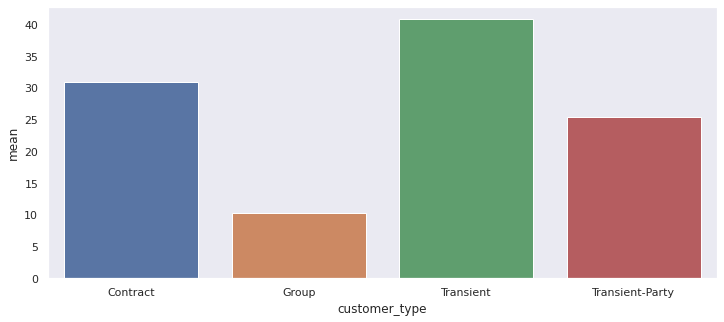

In [18]:
a = df.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

**ANALYSIS # 7 : Duration of Stay of People**        
**Result By Analysis :** This is just for Information of the Duration of Stay 

In [19]:
''' This function takes a series or data frame column and returns the two arrays
x is our unique values
y is the percentage value of each unique value'''

def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [20]:
'''
This function takes two arrays, x, and y and displays the required diagram. 
The default plot type is a bar plot, but it can also plot the line plot. 
Optional arguments can be given to display title and labels.
'''

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

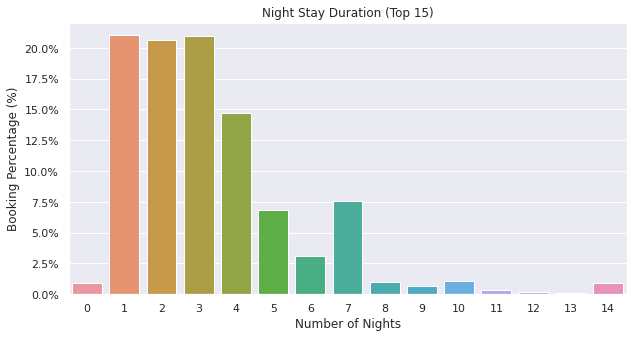

In [32]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=15)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 15)', figsize=(10,5))


**ANALYSIS # 8 : Comparison of Duration of Stay in both types of Hotel**        
**Result By Analysis :** This Analysis provide the comparison by which company get to know that in which type of hotel, people like to stay more.    

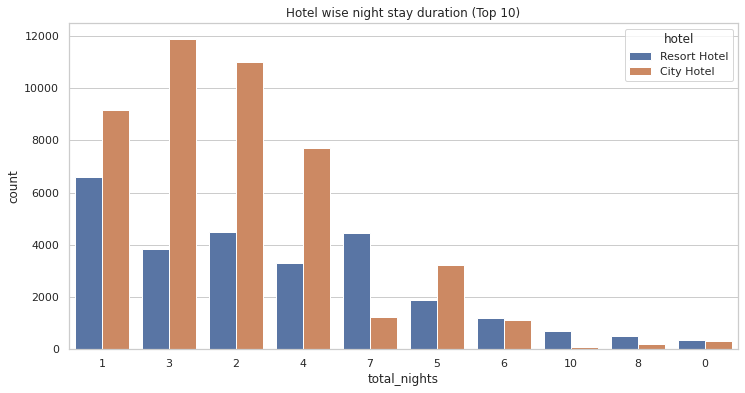

In [38]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

**ANALYSIS # 9 : Most Booked Accomodation Type**        
**Result By Analysis :** By this Analysis, company get to know, which accomodation type is highly booked, so that comapny can increase or decrease the types of accomodation in their property accordingly.

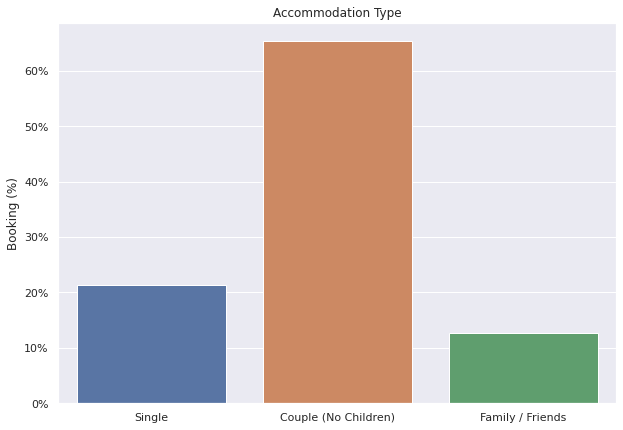

In [39]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))